## Data Collection & Organization

Data has been manually downloaded from [this GitHub repo](https://github.com/fcakyon/instafake-dataset) and organized in the data folder. For this project, we don't need to build or run any data pipeline. Data and files will be added to this [Fake Instagram Account Detection repo](https://github.com/midori256/Fake-Instagram-Account-Detection).

## Data Definition

Goal: Gain an understanding of our data features to inform the next steps of our project.

In [3]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sns.set_theme()

In [4]:
# load dataframes from json files
fake_df = pd.read_json("data/fakeAccountData.json")
real_df = pd.read_json("data/realAccountData.json")

In [3]:
real_df.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0


In [4]:
fake_df.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,25,1937,0,0,1,1,0,10,1
1,324,4122,0,0,1,0,4,15,1
2,15,399,0,0,0,0,3,12,1
3,14,107,0,1,1,0,1,10,1
4,264,4651,0,0,1,0,0,14,1


In [5]:
# check columns
# both dataframes have the same columns
real_df.columns

Index(['userFollowerCount', 'userFollowingCount', 'userBiographyLength',
       'userMediaCount', 'userHasProfilPic', 'userIsPrivate',
       'usernameDigitCount', 'usernameLength', 'isFake'],
      dtype='object')

### Column Descriptions

There are 9 columns which are defined as below:

1. user_media_count - Total number of posts, an account has.
2. user_follower_count - Total number of followers, an account has.
3. user_following_count - Total number of followings, an account has.
4. user_has_profil_pic - Whether an account has a profile picture, or not.
5. user_is_private - Whether an account is a private profile, or not.
6. user_biography_length - Number of characters present in account biography.
7. username_length - Number of characters present in account username.
8. username_digit_count - Number of digits present in account username.
9. is_fake - True, if account is a spam/fake account, False otherwise


In [6]:
# Check types of columns in real_df
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    994 non-null    int64
 1   userFollowingCount   994 non-null    int64
 2   userBiographyLength  994 non-null    int64
 3   userMediaCount       994 non-null    int64
 4   userHasProfilPic     994 non-null    int64
 5   userIsPrivate        994 non-null    int64
 6   usernameDigitCount   994 non-null    int64
 7   usernameLength       994 non-null    int64
 8   isFake               994 non-null    int64
dtypes: int64(9)
memory usage: 70.0 KB


In [7]:
# Check types of columns in fake_df
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    200 non-null    int64
 1   userFollowingCount   200 non-null    int64
 2   userBiographyLength  200 non-null    int64
 3   userMediaCount       200 non-null    int64
 4   userHasProfilPic     200 non-null    int64
 5   userIsPrivate        200 non-null    int64
 6   usernameDigitCount   200 non-null    int64
 7   usernameLength       200 non-null    int64
 8   isFake               200 non-null    int64
dtypes: int64(9)
memory usage: 14.2 KB


There are 994 records for real account, and only 200 records for fake accounts.

In [8]:
# check statistics for each dataframe
real_df.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0
mean,419.891348,516.138833,25.034205,68.473843,0.986922,0.724346,0.266600,11.070423,0.0
std,366.998029,517.709885,34.128111,113.963572,0.113668,0.447068,0.851721,2.877679,0.0
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0
25%,218.000000,267.000000,0.000000,8.000000,1.000000,0.000000,0.000000,9.000000,0.0
50%,345.000000,419.500000,12.000000,30.000000,1.000000,1.000000,0.000000,11.000000,0.0
75%,515.750000,614.000000,36.000000,78.750000,1.000000,1.000000,0.000000,13.000000,0.0
max,4492.000000,6640.000000,150.000000,1058.000000,1.000000,1.000000,7.000000,22.000000,0.0


In [9]:
fake_df.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.0
mean,116.640000,1878.030000,11.980000,3.535000,0.605000,0.32500,1.635000,11.390000,1.0
std,289.906744,1871.377801,27.757558,28.585036,0.490077,0.46955,1.902597,3.532747,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,1.0
25%,10.750000,278.000000,0.000000,0.000000,0.000000,0.00000,0.000000,9.000000,1.0
50%,29.500000,1446.500000,0.000000,0.000000,1.000000,0.00000,1.000000,11.000000,1.0
75%,102.500000,2505.500000,4.500000,1.000000,1.000000,1.00000,3.000000,13.000000,1.0
max,3208.000000,7497.000000,138.000000,396.000000,1.000000,1.00000,10.000000,30.000000,1.0


### Explore statistical distribution of the data

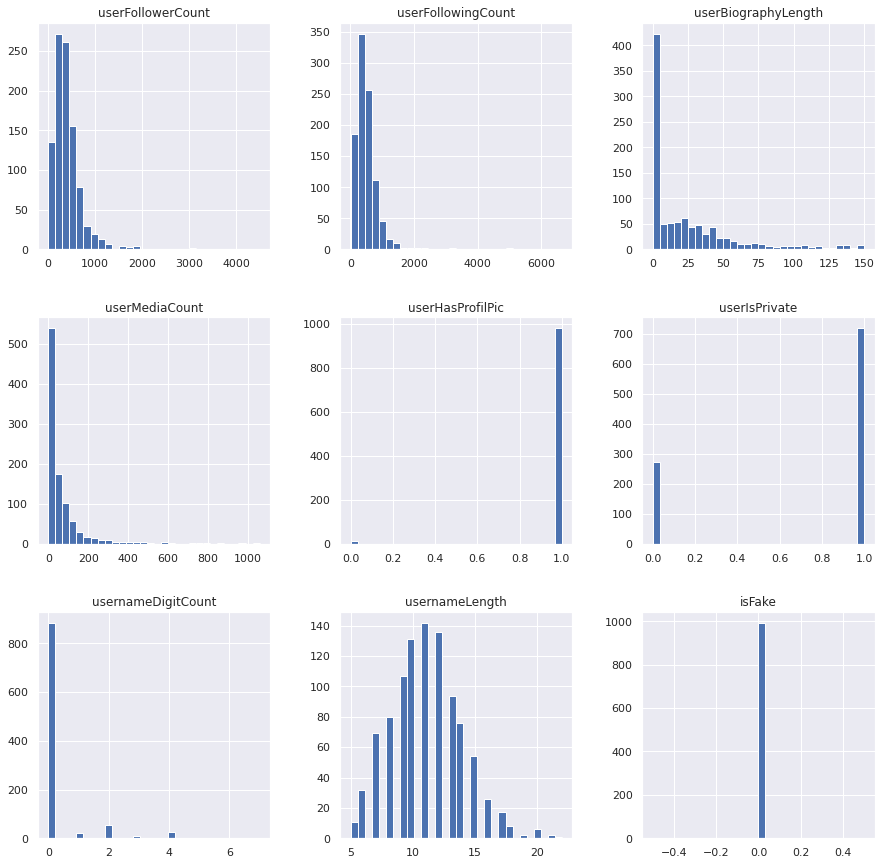

In [10]:
# Histogram of real account data
real_df.hist(figsize=(15,15), bins=30)
sns.set_theme()

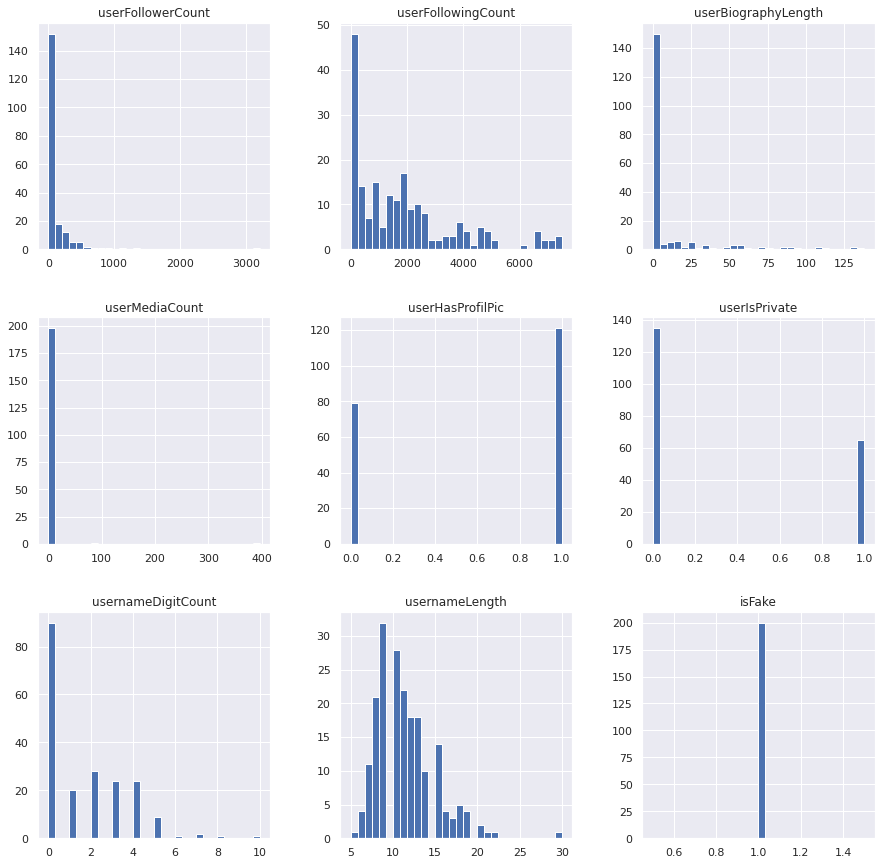

In [11]:
# Histogram of fake data
fake_df.hist(figsize=(15,15), bins=30)
sns.set_theme()

#### Comments
- Just by comparing the distribution of data points in the same variable in real and fake data sets, we could tell there are some slight differences.
- For example, majority of number of follower ("userFollowerCount") in real data set is more than zero, while it's mostly zero in the fake data set
- The distributions also look different in other variables. It might indicate that each of the variable might have some correlation with "isFake"

### Exploring variables

In [5]:
# looking at both real and fake account
df = pd.concat([real_df,fake_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    1194 non-null   int64
 1   userFollowingCount   1194 non-null   int64
 2   userBiographyLength  1194 non-null   int64
 3   userMediaCount       1194 non-null   int64
 4   userHasProfilPic     1194 non-null   int64
 5   userIsPrivate        1194 non-null   int64
 6   usernameDigitCount   1194 non-null   int64
 7   usernameLength       1194 non-null   int64
 8   isFake               1194 non-null   int64
dtypes: int64(9)
memory usage: 93.3 KB


In [5]:
# change data types
#df = df.astype({"userHasProfilPic":"category","userIsPrivate":"category","isFake":"category"})
#df.dtypes

userFollowerCount         int64
userFollowingCount        int64
userBiographyLength       int64
userMediaCount            int64
userHasProfilPic       category
userIsPrivate          category
usernameDigitCount        int64
usernameLength            int64
isFake                 category
dtype: object

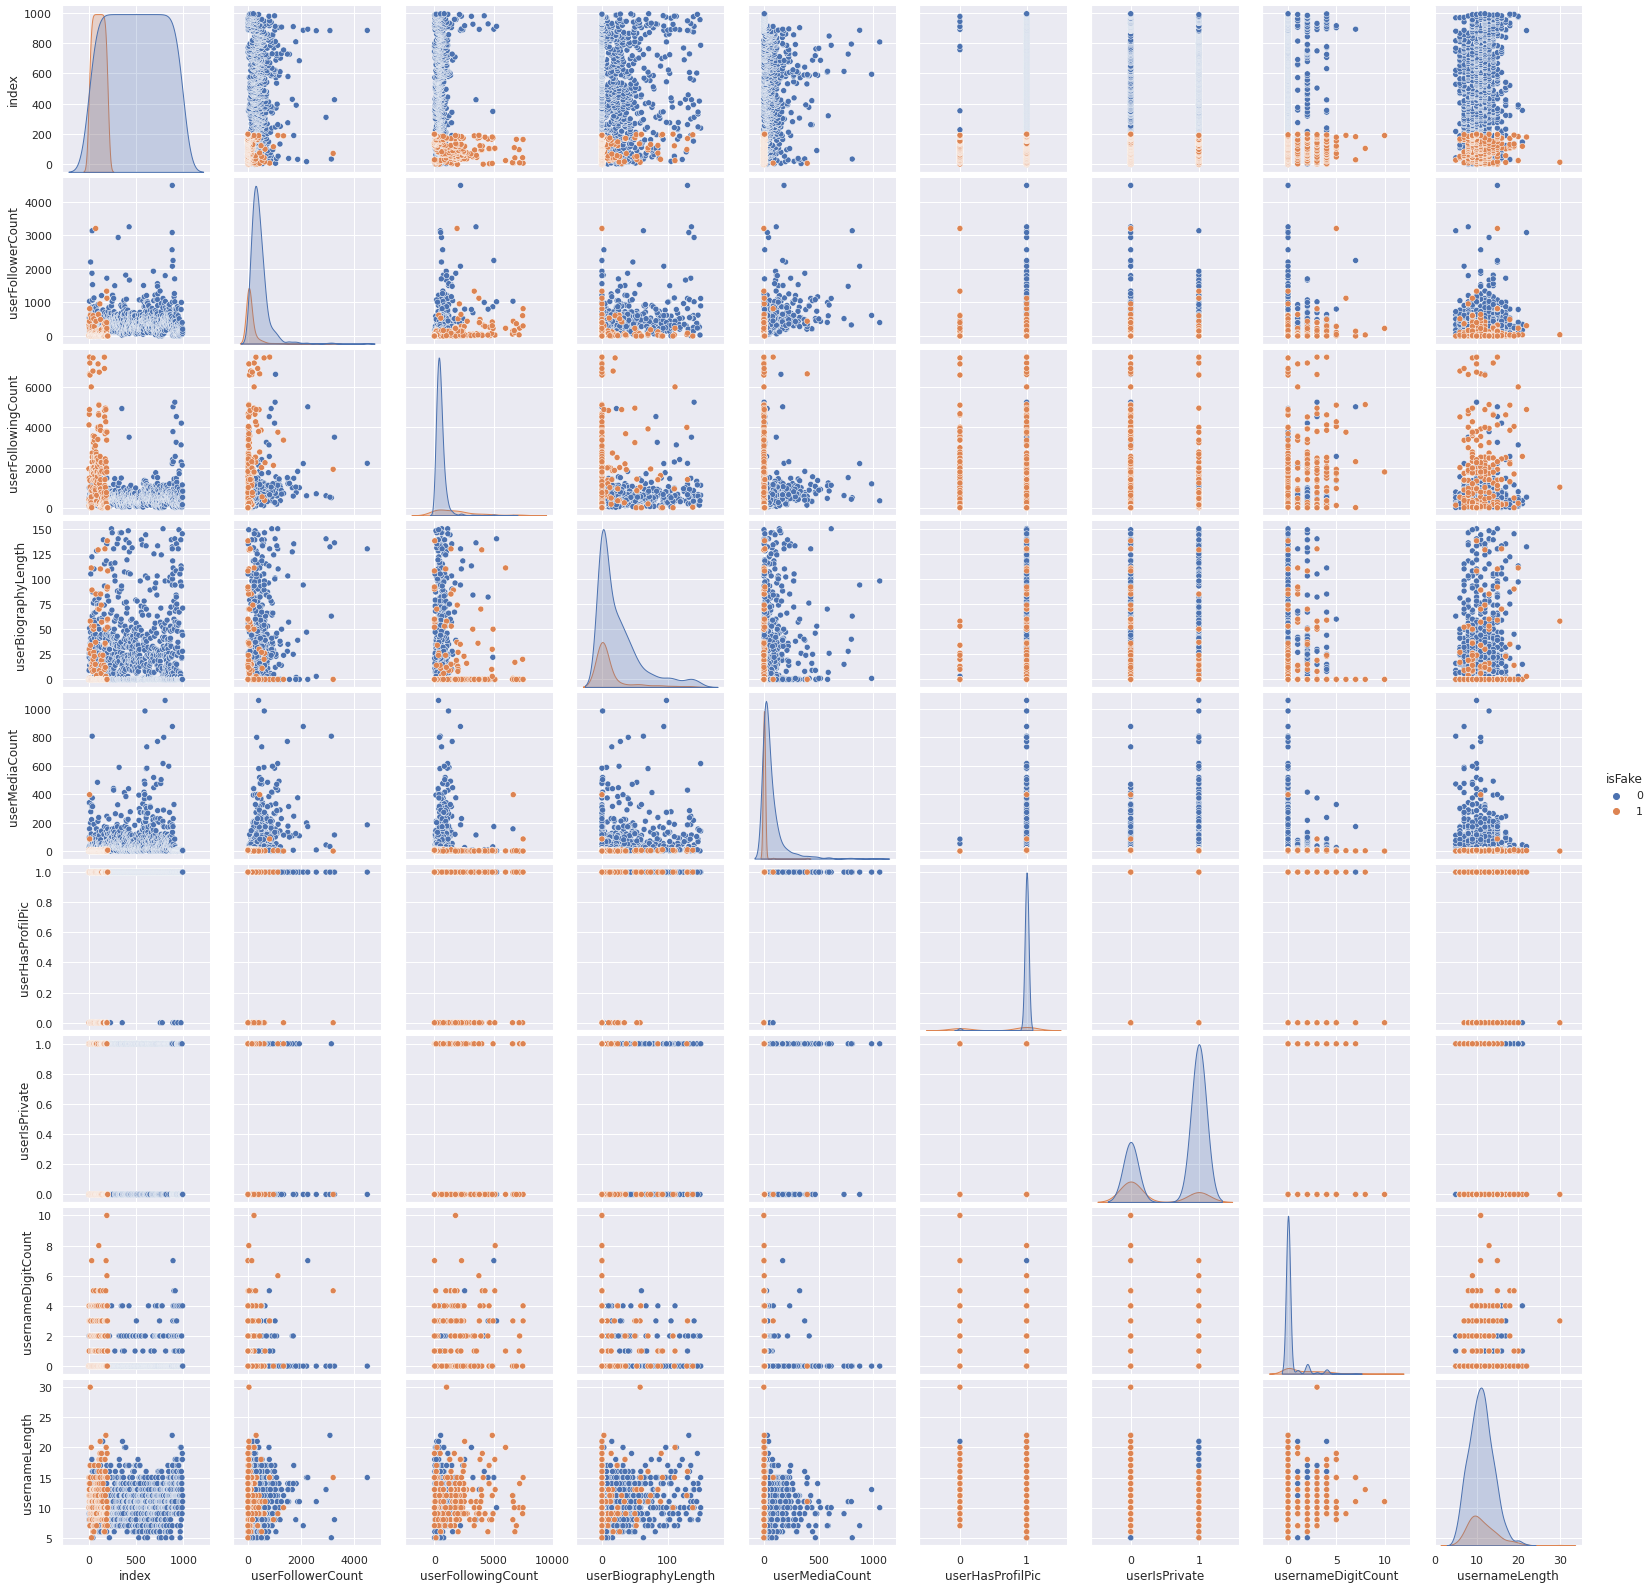

In [13]:
# pairplot all variables
sns.pairplot(data=df.reset_index(), hue="isFake")

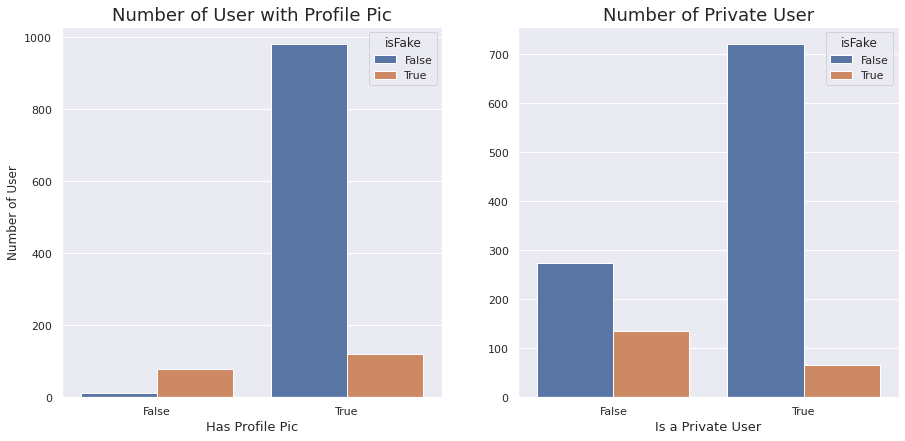

In [45]:
# Categorical variables
ax = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(data = df , x = "userHasProfilPic", hue="isFake")
plt.title("Number of User with Profile Pic" , size=18)
plt.xlabel("Has Profile Pic", size=13)
plt.ylabel("Number of User")
plt.subplot(2,2,2)
sns.countplot(data = df , x = "userIsPrivate", hue="isFake")
plt.title("Number of Private User" , size=18)
plt.xlabel("Is a Private User", size=13)
plt.ylabel("")
plt.show()


#### Comments
- If an user doesn't have a profile picture, it's more likely that they are a fake user than real user. In contrast, if they have a profile picture, it's more likely that they are a real user.
- If an user is a Private user, it's more likely that they are a real user.

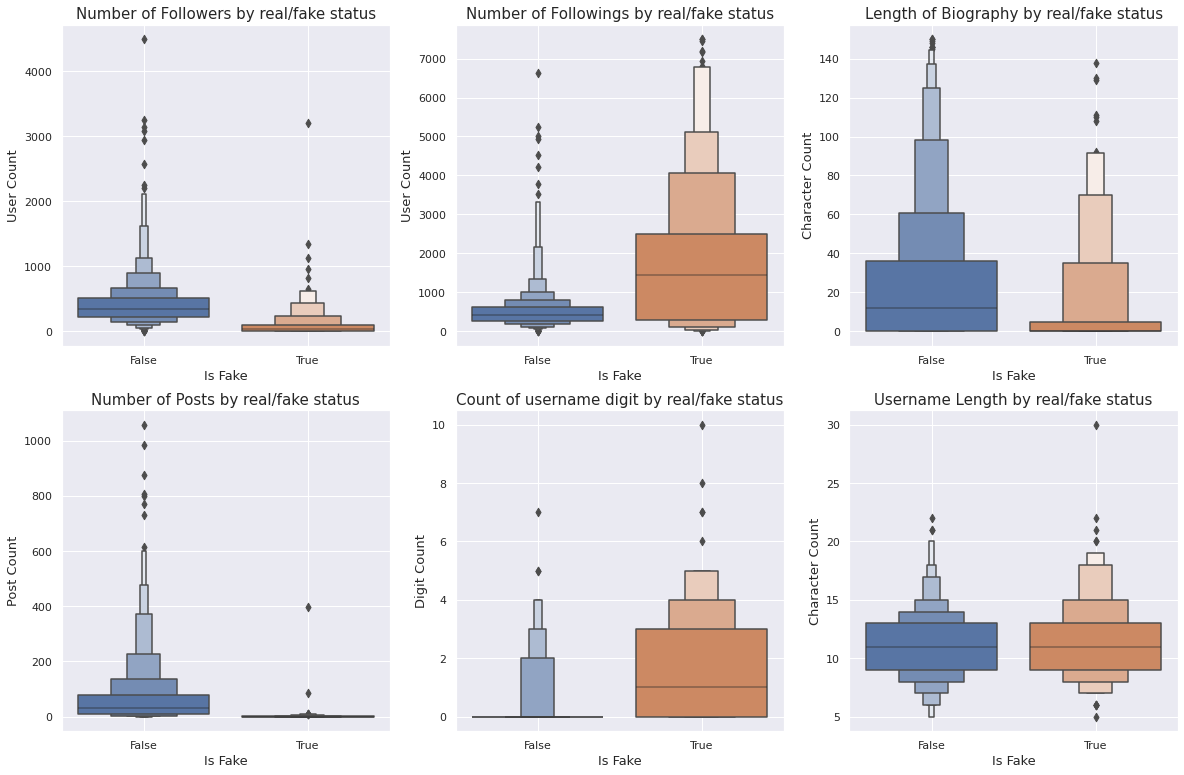

In [65]:
# Numerical variables
ax = plt.figure(figsize=(20,13))
plt.subplot(2,3,1)
sns.boxenplot(data = df , y = "userFollowerCount" , x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("User Count",size=13)
plt.title("Number of Followers by real/fake status", size=15)

plt.subplot(2,3,2)
sns.boxenplot(data = df , y = "userFollowingCount" ,  x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("User Count",size=13)
plt.title("Number of Followings by real/fake status", size=15)

plt.subplot(2,3,3)
sns.boxenplot(data = df , y = "userBiographyLength" ,  x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("Character Count",size=13)
plt.title("Length of Biography by real/fake status", size=15)

plt.subplot(2,3,4)
sns.boxenplot(data = df , y = "userMediaCount" ,  x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("Post Count",size=13)
plt.title("Number of Posts by real/fake status", size=15)

plt.subplot(2,3,5)
sns.boxenplot(data = df , y = "usernameDigitCount" ,  x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("Digit Count",size=13)
plt.title("Count of username digit by real/fake status", size=15)

plt.subplot(2,3,6)
sns.boxenplot(data = df , y = "usernameLength" ,  x = "isFake")
plt.grid(True)
plt.xlabel("Is Fake",size=13)
plt.ylabel("Character Count",size=13)
plt.title("Username Length by real/fake status", size=15)

plt.show()

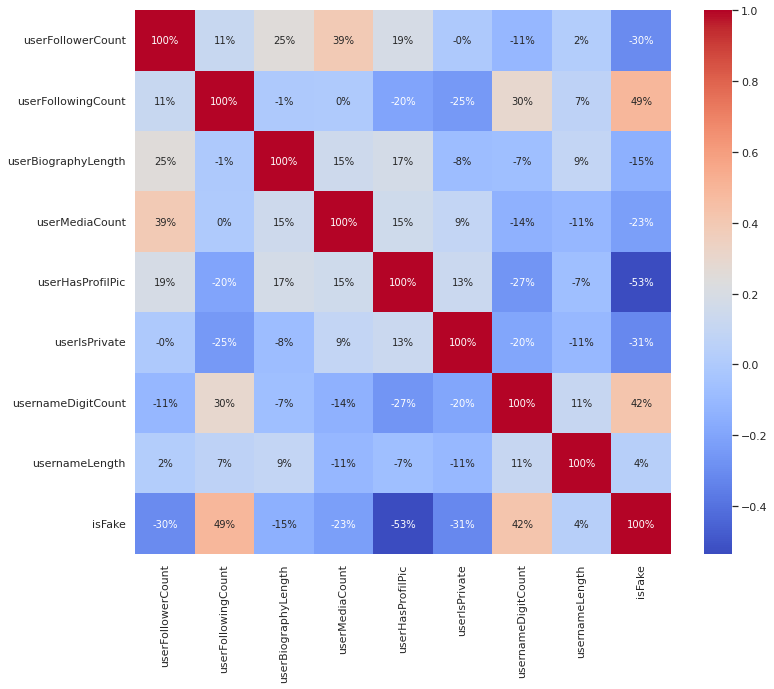

In [14]:
# correlation heatmap
ax = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", fmt='.0%')
plt.show()

## Pre-processing & Training Data Development

#### Improve the balance of the data set

Since the data set is small, we would apply oversampling technique to increase the size of the minority class

In [1]:
# install libraries
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, plot_roc_curve, precision_score, recall_score    

In [10]:
over_sampler = RandomOverSampler(sampling_strategy="minority")
X = df.iloc[:, :8]
Y = df.iloc[:, 8]

X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[:8]:
    o_df[i] = X_oversampled[i]
    counter += 1
    
o_df["isFake"] = Y_oversampled
df = o_df.copy()
Counter(Y_oversampled)

Counter({0: 994, 1: 994})

In [16]:
# check preprocessed dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    1988 non-null   int64
 1   userFollowingCount   1988 non-null   int64
 2   userBiographyLength  1988 non-null   int64
 3   userMediaCount       1988 non-null   int64
 4   userHasProfilPic     1988 non-null   int64
 5   userIsPrivate        1988 non-null   int64
 6   usernameDigitCount   1988 non-null   int64
 7   usernameLength       1988 non-null   int64
 8   isFake               1988 non-null   int64
dtypes: int64(9)
memory usage: 139.9 KB


array([[<AxesSubplot:title={'center':'userFollowerCount'}>,
        <AxesSubplot:title={'center':'userFollowingCount'}>,
        <AxesSubplot:title={'center':'userBiographyLength'}>],
       [<AxesSubplot:title={'center':'userMediaCount'}>,
        <AxesSubplot:title={'center':'userHasProfilPic'}>,
        <AxesSubplot:title={'center':'userIsPrivate'}>],
       [<AxesSubplot:title={'center':'usernameDigitCount'}>,
        <AxesSubplot:title={'center':'usernameLength'}>,
        <AxesSubplot:title={'center':'isFake'}>]], dtype=object)

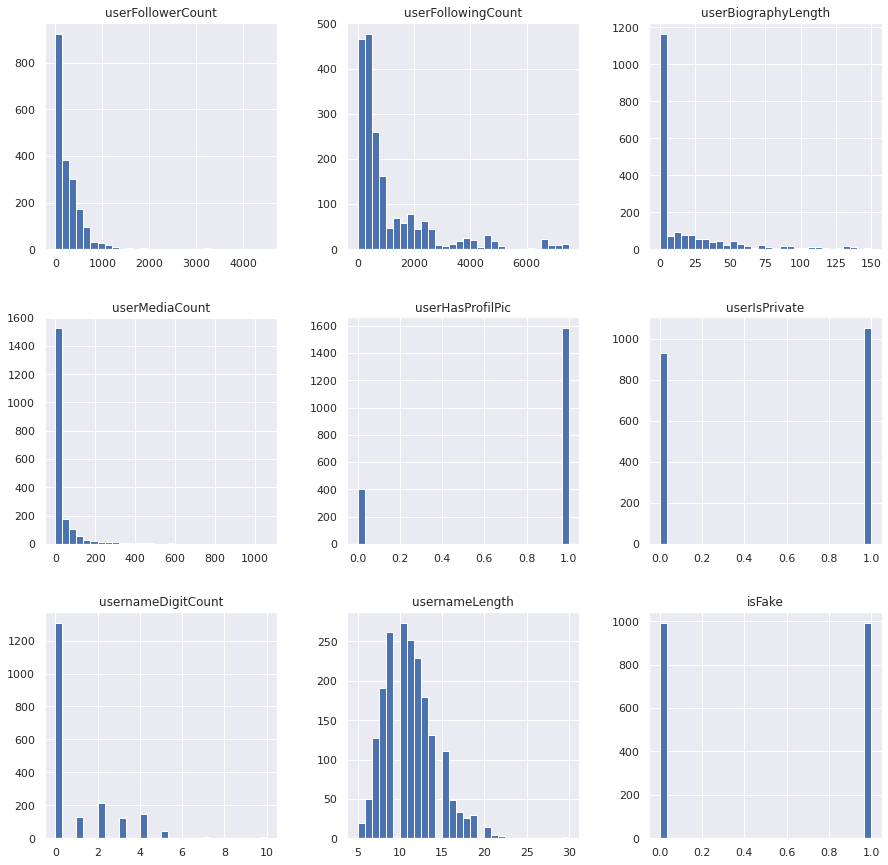

In [17]:
# check distribution of the new data
df.hist(figsize=(15,15), bins=30)

### Split data into training and Testing set

In [18]:
y = df["isFake"]
X = df.drop("isFake", axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [23]:
# come back later if needed
# from sklearn.preprocessing import StandardScaler
# Scaler_X = StandardScaler()
# X_train = Scaler_X.fit_transform(X_train)
# X_test = Scaler_X.transform(X_test)

In [24]:
#import performance evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8969849246231156
[[174  20]
 [ 21 183]]


/home/thuy/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       194
           1       0.90      0.90      0.90       204

    accuracy                           0.90       398
   macro avg       0.90      0.90      0.90       398
weighted avg       0.90      0.90      0.90       398

